In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [158]:
import os
from scipy import stats

def plot_transfer(max_timesteps,start_string, nbins, path):
    prefixed = [filename for filename in os.listdir(path) if (filename.startswith(start_string) and filename.endswith('.txt'))]
    timesteps = []
    returns = []
    episodes = []
    
    for file in prefixed:
        vanilla_df = pd.read_csv(path+file)

        frame_indices = (np.asarray((vanilla_df.iloc[:,1].str.split(expand=True)).iloc[:,-1]))
        return_indices = (np.asarray((vanilla_df.iloc[:,2].str.split(expand=True)).iloc[:,0]=="episodic_return_train"))
        episode_return = (np.asarray((vanilla_df.iloc[:,2].str.split(expand=True)).iloc[:,1]))

        frame = (frame_indices[return_indices])
        frame = frame.astype(np.float)
        try:
            first_index = np.argmax(frame>=max_timesteps)
        except:
            continue
        frame = frame[:first_index+1]
        eps_return = (episode_return[return_indices])
        eps_return = eps_return.astype(np.float)
        eps_return = eps_return[:first_index+1]

        timesteps = timesteps+frame.tolist()
        returns = returns+eps_return.tolist()
        episodes = episodes+(np.linspace(1,len(eps_return)+1,len(eps_return))).tolist()
        print(file)
        print(len(eps_return))
        
    x_axis_timesteps = np.linspace(0,max_timesteps,nbins)
    x_axis_episodes = np.linspace(0,max(episodes),nbins)
    output_timesteps = stats.binned_statistic(timesteps, returns, statistic='mean', range=(0,max_timesteps), bins=nbins)
    output_timesteps_std = stats.binned_statistic(timesteps, returns, statistic='std', range=(0,max_timesteps), bins=nbins)
    averages_timesteps = output_timesteps[0]
    averages_timesteps = np.nan_to_num(averages_timesteps, 0)
    averages_timesteps_std = output_timesteps_std[0]
    averages_timesteps_std = np.nan_to_num(averages_timesteps_std, 0)
    output_episodes = stats.binned_statistic(episodes, returns, statistic='mean', range=(0,max(episodes)), bins=nbins)
    output_episodes_std = stats.binned_statistic(episodes, returns, statistic='std', range=(0,max(episodes)), bins=nbins)
    averages_episodes = output_episodes[0]
    averages_episodes = np.nan_to_num(averages_episodes, 0)
    averages_episodes_std = output_episodes_std[0]
    averages_episodes_std = np.nan_to_num(averages_episodes_std, 0)
    
    return x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std
    

# Determinsitic env

# Learning comparison

## Learning curves for 80 eigvals

_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=80_-200406-203025.txt
84355
_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=80_-200406-204422.txt
88887
_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=80_-200406-190344.txt
105118
_FourRooms-v1_pvf_seed=1_run_iteration=3_num_eigvals=80_-200406-192547.txt
60873
_FourRooms-v1_pvf_seed=1_run_iteration=10_num_eigvals=80_-200406-201647.txt
89289
_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=80_-200406-191109.txt
92631
_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=80_-200406-194746.txt
94963
_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=80_-200406-191829.txt
79416
_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=80_-200406-200954.txt
80840
_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=80_-200406-203714.txt
108130
_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=80_-200406-202341.txt
91245
_FourRooms-v1_pvf_seed=1_run_iteration=8_num_eigvals=80_-200406-200238.txt
96563
_FourRooms-v1_pvf_see

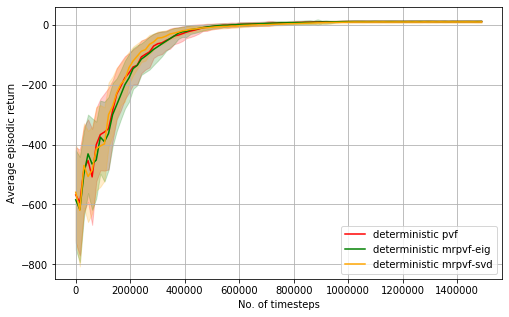

In [159]:
# Plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 1490000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/pvf__n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="deterministic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_eig_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="deterministic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_svd_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="deterministic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=80_-200406-203025.txt
84355
_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=80_-200406-204422.txt
88887
_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=80_-200406-190344.txt
105118
_FourRooms-v1_pvf_seed=1_run_iteration=3_num_eigvals=80_-200406-192547.txt
60873
_FourRooms-v1_pvf_seed=1_run_iteration=10_num_eigvals=80_-200406-201647.txt
89289
_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=80_-200406-191109.txt
92631
_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=80_-200406-194746.txt
94963
_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=80_-200406-191829.txt
79416
_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=80_-200406-200954.txt
80840
_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=80_-200406-203714.txt
108130
_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=80_-200406-202341.txt
91245
_FourRooms-v1_pvf_seed=1_run_iteration=8_num_eigvals=80_-200406-200238.txt
96563
_FourRooms-v1_pvf_see

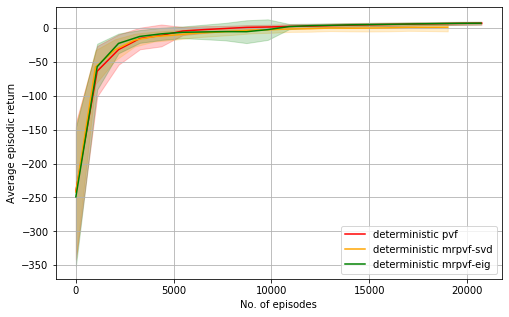

In [160]:
# Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 1490000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/pvf__n=80/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_svd_n=80/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_eig_n=80/')

# Plotting learning curves averaged over multiple runs and goals wrt episodes
plt.figure(figsize=(8,5))
max_timesteps = 999000
num = 20
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="deterministic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 20
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="deterministic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 20
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="deterministic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()


## Learning curves for 60 eigvals

_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=60_-200407-141558.txt
75968
_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=60_-200407-153824.txt
99092
_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=60_-200407-152527.txt
79013
_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=60_-200407-143657.txt
70574
_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=60_-200407-154505.txt
69917
_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=60_-200407-145019.txt
82042
_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=60_-200407-153159.txt
71530
_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=60_-200407-145740.txt
71661
_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=60_-200407-151210.txt
58382
_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=60_-200407-140842.txt
91323
_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=60_-200407-142311.txt
72993
_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=60_-200407-144335.txt
72478
_FourRooms-v1_pvf_seed=1

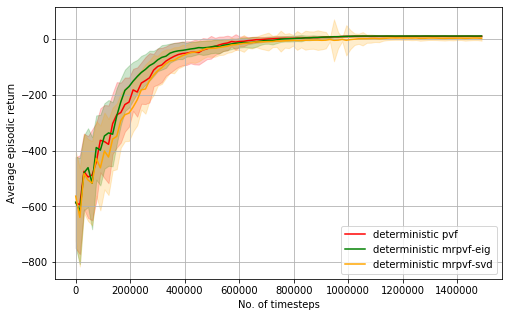

In [161]:
# Plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 1490000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/pvf__n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="deterministic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_eig_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="deterministic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_svd_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="deterministic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=60_-200407-141558.txt
75968
_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=60_-200407-153824.txt
99092
_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=60_-200407-152527.txt
79013
_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=60_-200407-143657.txt
70574
_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=60_-200407-154505.txt
69917
_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=60_-200407-145019.txt
82042
_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=60_-200407-153159.txt
71530
_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=60_-200407-145740.txt
71661
_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=60_-200407-151210.txt
58382
_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=60_-200407-140842.txt
91323
_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=60_-200407-142311.txt
72993
_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=60_-200407-144335.txt
72478
_FourRooms-v1_pvf_seed=1

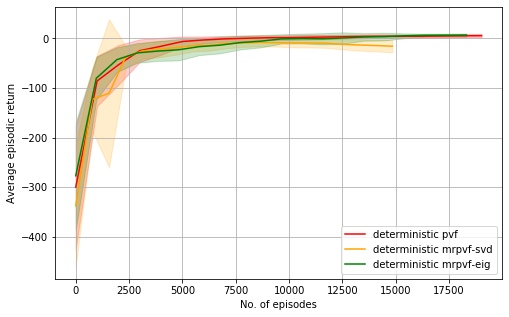

In [162]:
# Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 1490000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/pvf__n=60/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_svd_n=60/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_eig_n=60/')

# Plotting learning curves averaged over multiple runs and goals wrt episodes
plt.figure(figsize=(8,5))
max_timesteps = 999000
num = 20
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="deterministic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 20
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="deterministic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 20
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="deterministic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()


## Learning curves for 40 eigvals

_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=40_-200407-023430.txt
89945
_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=40_-200407-033248.txt
77693
_FourRooms-v1_pvf_seed=1_run_iteration=10_num_eigvals=40_-200407-035721.txt
74221
_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=40_-200407-040535.txt
85857
_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=40_-200407-024306.txt
63929
_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=40_-200407-025121.txt
71136
_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=40_-200407-043033.txt
81608
_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=40_-200407-030757.txt
70300
_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=40_-200407-032437.txt
67287
_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=40_-200407-034915.txt
55830
_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=40_-200407-031618.txt
78616
_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=40_-200407-042206.txt
107941
_FourRooms-v1_pvf_seed=

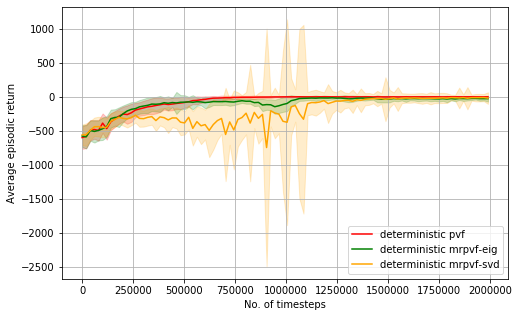

In [163]:
# Plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 1990000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/pvf__n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="deterministic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_eig_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="deterministic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_svd_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="deterministic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=40_-200407-023430.txt
89945
_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=40_-200407-033248.txt
77693
_FourRooms-v1_pvf_seed=1_run_iteration=10_num_eigvals=40_-200407-035721.txt
74221
_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=40_-200407-040535.txt
85857
_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=40_-200407-024306.txt
63929
_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=40_-200407-025121.txt
71136
_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=40_-200407-043033.txt
81608
_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=40_-200407-030757.txt
70300
_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=40_-200407-032437.txt
67287
_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=40_-200407-034915.txt
55830
_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=40_-200407-031618.txt
78616
_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=40_-200407-042206.txt
107941
_FourRooms-v1_pvf_seed=

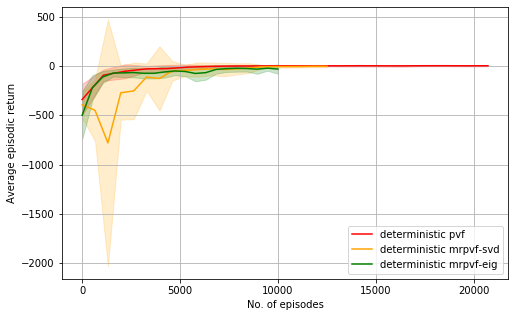

In [164]:
# Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 1990000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/pvf__n=40/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_svd_n=40/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/mrpvf_eig_n=40/')

# Plotting learning curves averaged over multiple runs and goals wrt episodes
plt.figure(figsize=(8,5))
max_timesteps = 999000
num = 20
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="deterministic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 20
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="deterministic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 20
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="deterministic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()


# Transfer comparison

## Goal transfer for 80 eigvals

_transfer_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=80_-200406-223253.txt
22854
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=80_-200406-224622.txt
20294
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=80_-200406-223945.txt
26063
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=80_-200406-224308.txt
18387
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=80_-200406-220625.txt
20037
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=80_-200406-222249.txt
11512
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=80_-200406-222606.txt
26078
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=80_-200406-224940.txt
23795
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=80_-200406-221609.txt
22671
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=3_num_eigvals=80_-200406-221251.txt
21530
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=80_-200406-221931.txt
21693
_trans

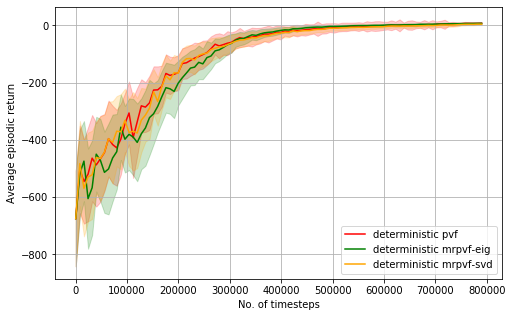

In [165]:
# Goal transfer: plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 790000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_pvf_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="deterministic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_eig_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="deterministic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_svd_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="deterministic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_transfer_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=80_-200406-223253.txt
22854
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=80_-200406-224622.txt
20294
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=80_-200406-223945.txt
26063
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=80_-200406-224308.txt
18387
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=80_-200406-220625.txt
20037
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=80_-200406-222249.txt
11512
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=80_-200406-222606.txt
26078
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=80_-200406-224940.txt
23795
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=80_-200406-221609.txt
22671
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=3_num_eigvals=80_-200406-221251.txt
21530
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=80_-200406-221931.txt
21693
_trans

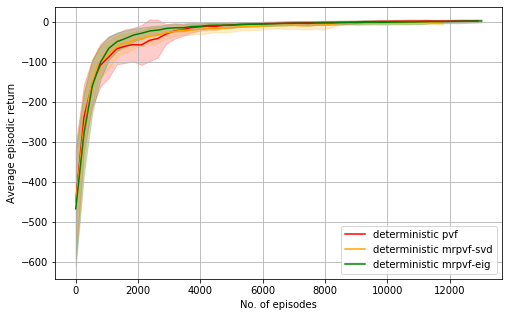

In [166]:
#Goal transfer: Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 790000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_pvf_n=80/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_svd_n=80/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_eig_n=80/')

plt.figure(figsize=(8,5))
max_timesteps = 790000
num = 50
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="deterministic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 50
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="deterministic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 50
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="deterministic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

## Goal transfer for 60 eigvals

_transfer_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=60_-200407-203337.txt
19093
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=60_-200407-204656.txt
13870
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=60_-200407-210956.txt
10442
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=60_-200407-204335.txt
18816
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=8_num_eigvals=60_-200407-205648.txt
10203
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=60_-200407-205015.txt
12040
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=60_-200407-210642.txt
15360
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=60_-200407-210002.txt
20017
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=3_num_eigvals=60_-200407-204018.txt
12309
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=60_-200407-205332.txt
15578
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=60_-200407-203659.txt
16341
_transfe

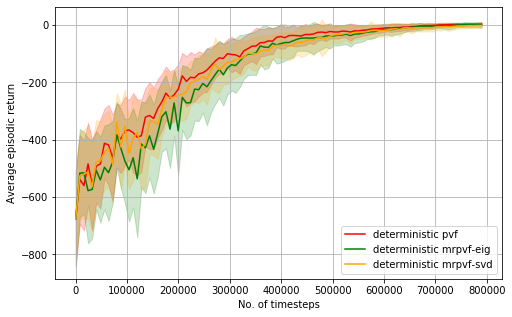

In [167]:
# Goal transfer: plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 790000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_pvf_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="deterministic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_eig_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="deterministic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_svd_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="deterministic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_transfer_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=60_-200407-203337.txt
19093
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=5_num_eigvals=60_-200407-204656.txt
13870
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=60_-200407-210956.txt
10442
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=60_-200407-204335.txt
18816
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=8_num_eigvals=60_-200407-205648.txt
10203
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=6_num_eigvals=60_-200407-205015.txt
12040
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=60_-200407-210642.txt
15360
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=60_-200407-210002.txt
20017
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=3_num_eigvals=60_-200407-204018.txt
12309
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=60_-200407-205332.txt
15578
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=2_num_eigvals=60_-200407-203659.txt
16341
_transfe

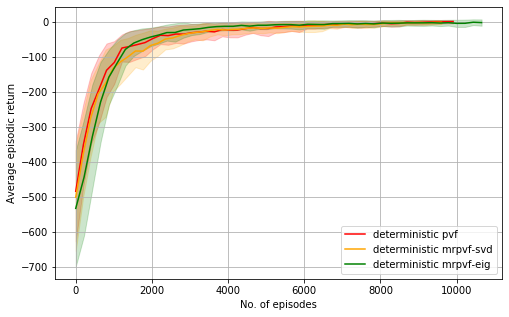

In [168]:
#Goal transfer: Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 790000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_pvf_n=60/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_svd_n=60/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_eig_n=60/')

plt.figure(figsize=(8,5))
max_timesteps = 790000
num = 50
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="deterministic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 50
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="deterministic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 50
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="deterministic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

## Goal transfer for 40 eigvals

_transfer_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=40_-200407-225248.txt
6119
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=40_-200407-230950.txt
8481
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=40_-200407-224244.txt
6765
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=10_num_eigvals=40_-200407-230258.txt
19138
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=40_-200407-222920.txt
9177
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=40_-200407-223240.txt
9093
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=40_-200407-225934.txt
12760
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=8_num_eigvals=40_-200407-225609.txt
14692
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=40_-200407-231310.txt
10003
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=40_-200407-231632.txt
8198
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=40_-200407-230625.txt
19138
_transfer_F

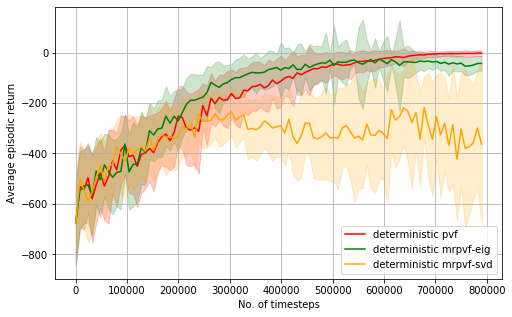

In [169]:
# Goal transfer: plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 790000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_pvf_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="deterministic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_eig_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="deterministic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_svd_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="deterministic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_transfer_FourRooms-v1_pvf_seed=1_run_iteration=7_num_eigvals=40_-200407-225248.txt
6119
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=12_num_eigvals=40_-200407-230950.txt
8481
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=4_num_eigvals=40_-200407-224244.txt
6765
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=10_num_eigvals=40_-200407-230258.txt
19138
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=0_num_eigvals=40_-200407-222920.txt
9177
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=1_num_eigvals=40_-200407-223240.txt
9093
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=9_num_eigvals=40_-200407-225934.txt
12760
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=8_num_eigvals=40_-200407-225609.txt
14692
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=13_num_eigvals=40_-200407-231310.txt
10003
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=14_num_eigvals=40_-200407-231632.txt
8198
_transfer_FourRooms-v1_pvf_seed=1_run_iteration=11_num_eigvals=40_-200407-230625.txt
19138
_transfer_F

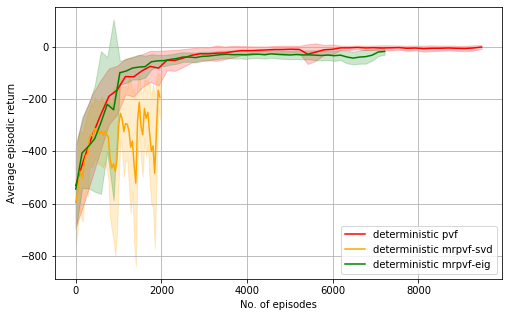

In [170]:
#Goal transfer: Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 790000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_pvf_n=40/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_svd_n=40/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/transfer_mrpvf_eig_n=40/')

plt.figure(figsize=(8,5))
max_timesteps = 790000
num = 50
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="deterministic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 50
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="deterministic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 50
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="deterministic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

# Stochastic env results

# Learning comparison

## Learning curves for 80 eigvals

_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=80_-200409-210555.txt
70901
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=80_-200409-204806.txt
75399
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=80_-200409-205701.txt
63139
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=80_-200409-194019.txt
72387
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=80_-200409-203914.txt
71527
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=80_-200409-200143.txt
57810
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=80_-200409-203019.txt
74367
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=80_-200409-214754.txt
73711
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=80_-200409-195142.txt
67210
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=80_-200409-192856.txt
85291
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=80_

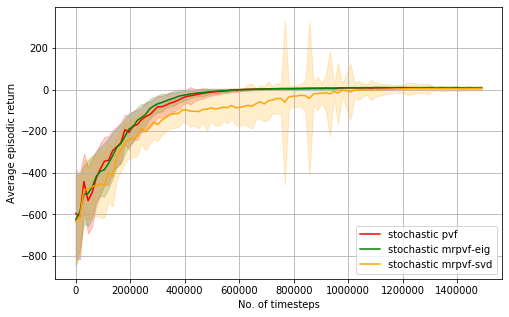

In [171]:
# Plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 1490000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_pvf__n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="stochastic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_eig_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="stochastic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_svd_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="stochastic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=80_-200409-210555.txt
70901
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=80_-200409-204806.txt
75399
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=80_-200409-205701.txt
63139
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=80_-200409-194019.txt
72387
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=80_-200409-203914.txt
71527
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=80_-200409-200143.txt
57810
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=80_-200409-203019.txt
74367
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=80_-200409-214754.txt
73711
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=80_-200409-195142.txt
67210
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=80_-200409-192856.txt
85291
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=80_

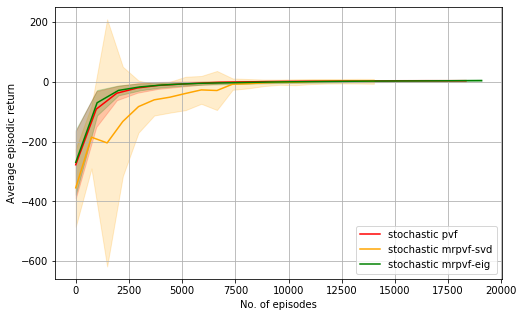

In [172]:
# Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 1490000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_pvf__n=80/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_svd_n=80/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_eig_n=80/')

# Plotting learning curves averaged over multiple runs and goals wrt episodes
plt.figure(figsize=(8,5))
max_timesteps = 999000
num = 20
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="stochastic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 20
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="stochastic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 20
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="stochastic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

## Learning curves for 60 eigvals

_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=5_num_eigvals=60_-200409-202022.txt
53563
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=13_num_eigvals=60_-200409-213304.txt
72120
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=60_-200409-204643.txt
59432
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=11_num_eigvals=60_-200409-211307.txt
57121
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=60_-200409-201113.txt
50608
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=60_-200409-203808.txt
50251
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=60_-200409-195136.txt
53790
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=60_-200409-210404.txt
51599
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=60_-200409-200123.txt
45337
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=60_-200409-192919.txt
59185
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=60

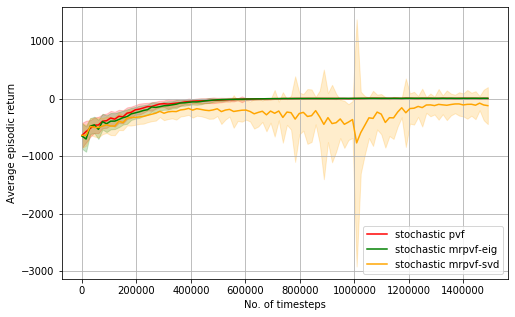

In [173]:
# Plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 1490000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_pvf__n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="stochastic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_eig_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="stochastic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_svd_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="stochastic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=5_num_eigvals=60_-200409-202022.txt
53563
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=13_num_eigvals=60_-200409-213304.txt
72120
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=60_-200409-204643.txt
59432
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=11_num_eigvals=60_-200409-211307.txt
57121
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=60_-200409-201113.txt
50608
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=60_-200409-203808.txt
50251
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=60_-200409-195136.txt
53790
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=60_-200409-210404.txt
51599
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=60_-200409-200123.txt
45337
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=60_-200409-192919.txt
59185
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=60

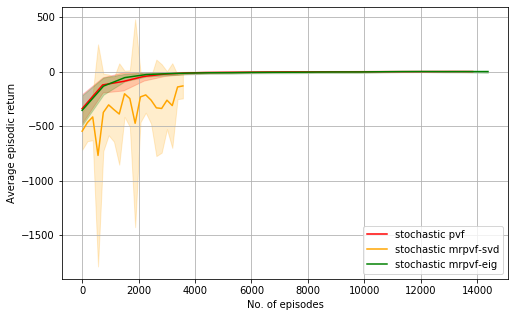

In [174]:
# Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 1490000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_pvf__n=60/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_svd_n=60/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_eig_n=60/')

# Plotting learning curves averaged over multiple runs and goals wrt episodes
plt.figure(figsize=(8,5))
max_timesteps = 999000
num = 20
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="stochastic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 20
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="stochastic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 20
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="stochastic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

## Learning curves for 40 eigvals

_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=40_-200410-133914.txt
57039
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=12_num_eigvals=40_-200410-142555.txt
62641
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=40_-200410-140144.txt
68498
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=40_-200410-124441.txt
58431
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=40_-200410-135050.txt
46950
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=40_-200410-131541.txt
67681
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=40_-200410-145900.txt
68830
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=40_-200410-123503.txt
69132
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=40_-200410-121502.txt
64589
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=40_-200410-132656.txt
64965
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=40

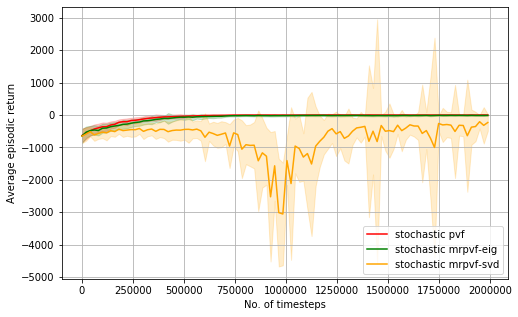

In [175]:
# Plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 1990000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_pvf__n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="stochastic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_eig_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="stochastic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1_", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_svd_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="stochastic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=40_-200410-133914.txt
57039
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=12_num_eigvals=40_-200410-142555.txt
62641
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=40_-200410-140144.txt
68498
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=40_-200410-124441.txt
58431
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=40_-200410-135050.txt
46950
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=40_-200410-131541.txt
67681
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=40_-200410-145900.txt
68830
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=40_-200410-123503.txt
69132
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=40_-200410-121502.txt
64589
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=40_-200410-132656.txt
64965
_stochastic_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=40

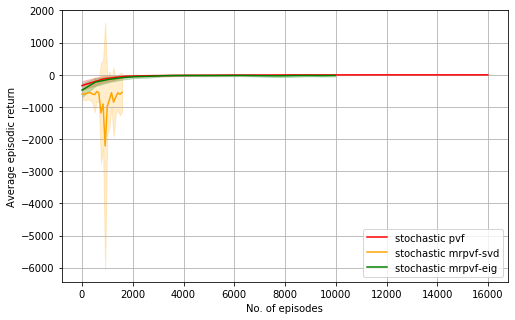

In [176]:
# Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 1990000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_pvf__n=40/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_svd_n=40/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_stochastic_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_mrpvf_eig_n=40/')

# Plotting learning curves averaged over multiple runs and goals wrt episodes
plt.figure(figsize=(8,5))
max_timesteps = 999000
num = 20
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="stochastic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 20
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="stochastic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 20
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="stochastic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

# Transfer comparison

## Goal transfer for 80 eigvals

_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=80_-200411-174814.txt
22003
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=80_-200411-171840.txt
21073
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=80_-200411-165812.txt
12599
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=80_-200411-172847.txt
23201
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=80_-200411-164918.txt
18439
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=80_-200411-170829.txt
14664
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=80_-200411-165343.txt
18134
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=80_-200411-172341.txt
21291
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=12_num_eigvals=80_-200411-173847.txt
14367
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=80_-2

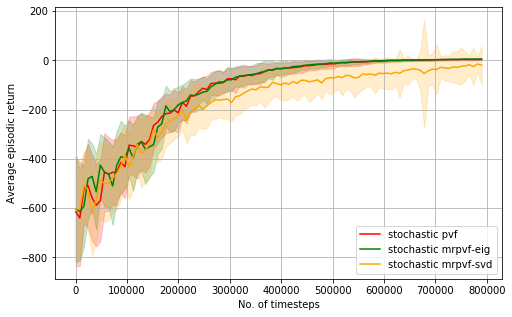

In [177]:
# Goal transfer: plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 790000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_pvf_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="stochastic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_eig_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="stochastic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_svd_n=80/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="stochastic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=80_-200411-174814.txt
22003
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=80_-200411-171840.txt
21073
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=80_-200411-165812.txt
12599
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=10_num_eigvals=80_-200411-172847.txt
23201
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=80_-200411-164918.txt
18439
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=80_-200411-170829.txt
14664
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=80_-200411-165343.txt
18134
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=80_-200411-172341.txt
21291
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=12_num_eigvals=80_-200411-173847.txt
14367
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=80_-2

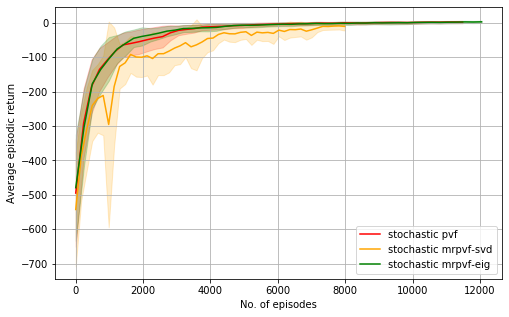

In [178]:
#Goal transfer: Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 790000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_pvf_n=80/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_svd_n=80/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_eig_n=80/')

plt.figure(figsize=(8,5))
max_timesteps = 790000
num = 50
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="stochastic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 50
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="stochastic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 50
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="stochastic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

## Goal transfer for 60 eigvals

_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=60_-200411-160640.txt
17241
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=60_-200411-161059.txt
18740
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=13_num_eigvals=60_-200411-162748.txt
12926
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=60_-200411-154111.txt
12791
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=60_-200411-163209.txt
16457
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=60_-200411-153300.txt
16815
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=60_-200411-154937.txt
15300
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=11_num_eigvals=60_-200411-161934.txt
20455
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=60_-200411-160228.txt
13633
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=60_-2

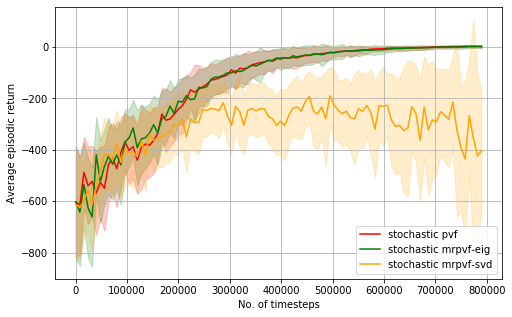

In [179]:
# Goal transfer: plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 790000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_pvf_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="stochastic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_eig_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="stochastic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_svd_n=60/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="stochastic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=60_-200411-160640.txt
17241
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=60_-200411-161059.txt
18740
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=13_num_eigvals=60_-200411-162748.txt
12926
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=60_-200411-154111.txt
12791
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=60_-200411-163209.txt
16457
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=60_-200411-153300.txt
16815
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=60_-200411-154937.txt
15300
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=11_num_eigvals=60_-200411-161934.txt
20455
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=7_num_eigvals=60_-200411-160228.txt
13633
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=60_-2

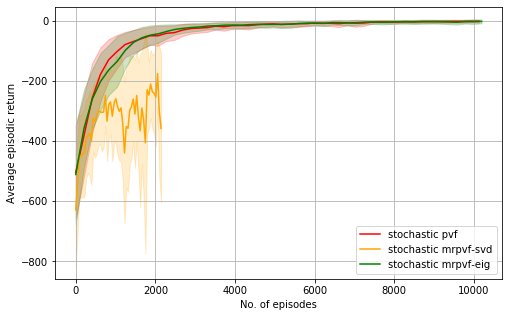

In [180]:
#Goal transfer: Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 790000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_pvf_n=60/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_svd_n=60/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_eig_n=60/')

plt.figure(figsize=(8,5))
max_timesteps = 790000
num = 50
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="stochastic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 50
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="stochastic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 50
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="stochastic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

## Goal transfer for 40 eigvals

_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=40_-200410-224044.txt
11653
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=40_-200410-224423.txt
15605
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=40_-200410-225550.txt
11396
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=40_-200410-231524.txt
12454
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=40_-200410-225201.txt
6171
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=40_-200410-233422.txt
8977
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=40_-200410-231131.txt
15935
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=40_-200410-230339.txt
11279
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=40_-200410-224810.txt
7940
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=13_num_eigvals=40_-20041

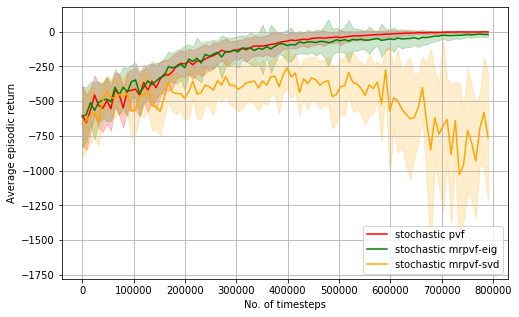

In [181]:
# Goal transfer: plotting learning curves averaged over multiple runs and goals
plt.figure(figsize=(8,5))
max_timesteps = 790000
x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_pvf_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, 'r-', label="stochastic pvf")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='r')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_eig_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "g", label="stochastic mrpvf-eig")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='g')

x_axis_timesteps,averages_timesteps,averages_timesteps_std,x_axis_episodes,averages_episodes,averages_episodes_std = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_svd_n=40/')
plt.plot(x_axis_timesteps,averages_timesteps, '-', color = "orange", label="stochastic mrpvf-svd")
averages_timesteps_std = averages_timesteps_std*0.25
plt.fill_between(x_axis_timesteps, averages_timesteps-averages_timesteps_std, averages_timesteps+averages_timesteps_std, alpha=0.2, color='orange')

plt.xlabel("No. of timesteps"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=0_num_eigvals=40_-200410-224044.txt
11653
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=1_num_eigvals=40_-200410-224423.txt
15605
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=4_num_eigvals=40_-200410-225550.txt
11396
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=9_num_eigvals=40_-200410-231524.txt
12454
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=3_num_eigvals=40_-200410-225201.txt
6171
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=14_num_eigvals=40_-200410-233422.txt
8977
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=8_num_eigvals=40_-200410-231131.txt
15935
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=6_num_eigvals=40_-200410-230339.txt
11279
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=2_num_eigvals=40_-200410-224810.txt
7940
_stochastic_transfer_FourRooms-v1_pvf__seed=1_run_iteration=13_num_eigvals=40_-20041

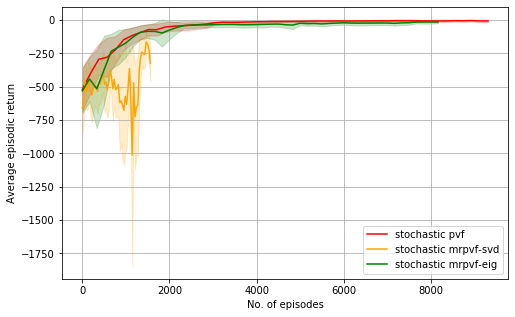

In [182]:
#Goal transfer: Plotting learning curves averaged over multiple runs and goals wrt episodes
max_timesteps = 790000
x_axis_timesteps_1,averages_timesteps_1,averages_timesteps_std_1,x_axis_episodes_1,averages_episodes_1,averages_episodes_std_1 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_pvf_n=40/')
x_axis_timesteps_2,averages_timesteps_2,averages_timesteps_std_2,x_axis_episodes_2,averages_episodes_2,averages_episodes_std_2 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_svd_n=40/')
x_axis_timesteps_3,averages_timesteps_3,averages_timesteps_std_3,x_axis_episodes_3,averages_episodes_3,averages_episodes_std_3 = plot_transfer(max_timesteps, start_string="_stochastic_transfer_FourRooms-v1", nbins=100, path = '/Users/ravi/msc_code/mrpvf/log/stochastic_transfer_mrpvf_eig_n=40/')

plt.figure(figsize=(8,5))
max_timesteps = 790000
num = 50
plt.plot(x_axis_episodes_1[:num],averages_episodes_1[:num], 'r-', label="stochastic pvf")
averages_episodes_std = averages_episodes_std_1*0.25
plt.fill_between(x_axis_episodes_1[:num], averages_episodes_1[:num]-averages_episodes_std[:num], averages_episodes_1[:num]+averages_episodes_std[:num], alpha=0.2, color='r')

num = 50
plt.plot(x_axis_episodes_2[:num],averages_episodes_2[:num], '-', color='orange', label="stochastic mrpvf-svd")
averages_episodes_std = averages_episodes_std_2*0.25
plt.fill_between(x_axis_episodes_2[:num], averages_episodes_2[:num]-averages_episodes_std[:num], averages_episodes_2[:num]+averages_episodes_std[:num], alpha=0.2, color='orange')

num = 50
plt.plot(x_axis_episodes_3[:num],averages_episodes_3[:num], 'g-', label="stochastic mrpvf-eig")
averages_episodes_std = averages_episodes_std_3*0.25
plt.fill_between(x_axis_episodes_3[:num], averages_episodes_3[:num]-averages_episodes_std[:num], averages_episodes_3[:num]+averages_episodes_std[:num], alpha=0.2, color='g')

plt.xlabel("No. of episodes"); plt.ylabel("Average episodic return")
plt.legend(loc=4)
#plt.yscale('symlog',basey=10) 
plt.grid(True)
plt.show()

# Ignore everything below

In [37]:
a = np.array([[2,1],[0,2]])
print(np.linalg.svd(a))
print(np.linalg.svd(b))

(array([[ 0.78820544, -0.61541221],
       [ 0.61541221,  0.78820544]]), array([2.56155281, 1.56155281]), array([[ 0.61541221,  0.78820544],
       [-0.78820544,  0.61541221]]))
(array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]]), array([3., 1.]), array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]]))


In [98]:
from scipy.linalg import eig,svd
a = np.array([[2,0,0],[1,0,0],[0,1,0]])
w,vl,vr = eig(a, right=True, left=True)
print(w,vl,vr)
w,v = eigh(a, eigvals = (0,2))
print(w,v)

[0.+0.j 0.+0.j 2.+0.j] [[ 4.47213595e-001 -4.47213595e-001  1.00000000e+000]
 [-8.94427191e-001  8.94427191e-001  0.00000000e+000]
 [ 2.68887401e-292  0.00000000e+000  0.00000000e+000]] [[ 0.00000000e+000  0.00000000e+000  8.72871561e-001]
 [ 0.00000000e+000  3.00625254e-292  4.36435780e-001]
 [ 1.00000000e+000 -1.00000000e+000  2.18217890e-001]]
[-1.17008649  0.68889218  2.4811943 ] [[ 0.23319198 -0.39711255  0.88765034]
 [-0.73923874  0.52065737  0.42713229]
 [ 0.63178128  0.75578934  0.17214786]]


In [99]:
u, s, vh = np.linalg.svd(a)
print(u,s,vh)

[[-0.89442719  0.          0.4472136 ]
 [-0.4472136   0.         -0.89442719]
 [ 0.         -1.          0.        ]] [2.23606798 1.         0.        ] [[-1. -0. -0.]
 [-0. -1. -0.]
 [ 0.  0.  1.]]


In [97]:
from scipy.linalg import eig,svd
b = np.array([[2,1,0],[1,2,0],[0,0,2]])
w,vl,vr = eig(b, right=True, left=True)
print(w,vl,vr)
w,v = eigh(b, eigvals = (0,2))
print(w,v)

[3.+0.j 1.+0.j 2.+0.j] [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]] [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[1. 2. 3.] [[ 0.70710678  0.          0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]


In [105]:
u, s, vh = svd(b)
print(u,s,vh)

[[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]] [3. 2. 1.] [[-0.70710678 -0.70710678 -0.        ]
 [ 0.          0.          1.        ]
 [-0.70710678  0.70710678  0.        ]]


Observations: if u,sigma (s),v obtained with SVD (scipy.linalg.svd) for symmetrix matrix A, then u is same as scipy.linalg.eigh. i.e. svd and eigen decomposition give exact same eigen values and vectors, but the vectors might be of different direction. Note that the eigen and singular vectors are the columns, not the rows.

In [112]:
temp = np.random.rand(5,5)
print(temp)
print(temp[:,-2:])

[[0.21090783 0.5259399  0.58812341 0.42691221 0.31886045]
 [0.03985467 0.12629464 0.76230013 0.39691846 0.29204599]
 [0.20046161 0.2042079  0.06772918 0.94308305 0.48030517]
 [0.28766008 0.26424507 0.23902115 0.69361098 0.97633526]
 [0.69831328 0.99197813 0.55545758 0.79541734 0.44944426]]
[[0.42691221 0.31886045]
 [0.39691846 0.29204599]
 [0.94308305 0.48030517]
 [0.69361098 0.97633526]
 [0.79541734 0.44944426]]


In [139]:
temp = np.random.rand(5,5)
diag = np.array([2,0,2,2,0])
print(temp)
#print(np.array(np.diagonal(temp)))
new_diag = np.array(np.diagonal(temp))
new_diag[diag>0] += 1
print(diag>0)
np.fill_diagonal(temp,new_diag)
print(temp)

[[0.14306274 0.54559478 0.26209348 0.1493243  0.35858101]
 [0.36827299 0.89949432 0.89341786 0.218605   0.5563366 ]
 [0.04850027 0.41995815 0.6814548  0.50869388 0.57455868]
 [0.82719575 0.70619361 0.08442317 0.70876516 0.49281755]
 [0.60868041 0.29317788 0.99128832 0.97582105 0.50064699]]
[ True False  True  True False]
[[1.14306274 0.54559478 0.26209348 0.1493243  0.35858101]
 [0.36827299 0.89949432 0.89341786 0.218605   0.5563366 ]
 [0.04850027 0.41995815 1.6814548  0.50869388 0.57455868]
 [0.82719575 0.70619361 0.08442317 1.70876516 0.49281755]
 [0.60868041 0.29317788 0.99128832 0.97582105 0.50064699]]
